####  **Professor:  $\;\;\;$Hong Hyung-Woo** 
####  **Student NB: $\;\;\;\;\;\;\;\;\;\;\;$ 20166450** 
####  **Major:           $\;\;\;$ Software Engineering**
####  **Name:         $\;\;\;\;\;\;\;\;\;\;\;$   Kim Young Min**

$\;$

$\;$

[K-means algorithm on color image]

Let $f(x)$ be a color image and $x$ be the index of image in the domain.
The values of image $f(x)$ consist of [red, green, blue] intensity.

Apply K-means algorithm to image $f(x)$ based on its color value with given number of clusters $K$ and visualize the progress of optimization and results of the algorithm for each selected number of clusters $K$.

1. Select any color image that consists of distinctive regions with different colors.
2. Apply K-means algorithm to the given image with at least 4 different choice of $K$.
3. For each $K$, plot the energy curve and the result image.


[Visualisation]

1. Input color image
2. Energy curve for each $K$
3. Output image for each $K$


[Energy]
$\;$

$\frac{1}{n} \sum_{x \in \Omega} \| f(x) - m_c \|^2,$
$\;$

where $\Omega$ denotes the image domain and the number of pixels $| \Omega |$ is $n$, and $m_c$ denotes the centroid for cluster $c$ that is the cluster label of $f(x)$.


[Output Image]

$g(x) = m_c$ where label(x) = c

Each pixel of the output image $g(x)$ should be its centroid $m_c$ where $c$ is the cluster label of $g(x)$.

$\;$

$\;$

### Start!

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import *
import numpy as np
import cv2

# Input color image

R= [255 255 255 ... 255 255 255]
G= [255 255 255 ... 255 255 255]
B= [255 255 255 ... 255 255 255]


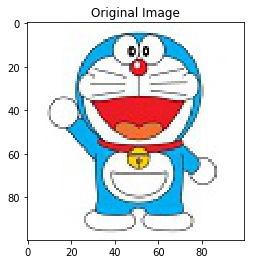

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]


In [8]:
img = cv2.imread('color.jpg',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


r,g,b =cv2. split(img)
r= r.flatten()
g= g.flatten()
b= b.flatten()
print("R=",r)
print("G=",g)
print("B=",b)

plt.subplot(1,1,1)
plt.imshow(img)
plt.title("Original Image")
plt.show()

# For comvenience about getting a clusterimage by K-means algorithms
img_10000=img.reshape(10000,3)
print(img_10000)

In [9]:
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    return(s)



def kmeans_label(label,init_vec,img):
   
    z=[0]*len(init_vec)
    
    for j in range(len(img)):
        for i in range(len(init_vec)):
            z[i]=distance(img[j],init_vec[i])
        label[j]=np.argmin(z)
    
    return label
        

def energy_func(img,avg_image,avg_label,ener_sum):
    ener_sum=0
    for i in range(10000):
        d=(img[i]-avg_image[avg_label[i]])**2
        ener_sum+=np.sum(d)
    
    return(ener_sum)/10000




def Kmeans_algorithm(label,kmeans_vec,init_vec,img,ener_sum,list_ener):
    
    many=0
    kmeans_label(label,init_vec,img)
    avg_label=np.array([0]*(len(img)))
    avg_image=np.array([[0]*3]*(len(init_vec)))
    avg_label=np.copy(label)
    
    while(1):
        
        cnt=[0]*len(init_vec)
        label=np.copy(avg_label)
        avg_label=np.array([0]*len(img))
        avg_image=np.array([[0]*3]*(len(init_vec)))
        
        for k in range(len(label)):
            avg_image[label[k]]+=img[k]
            cnt[label[k]]+=1
            
        for l in range(len(init_vec)):
            if (cnt[l]!=0):
                avg_image[l]=avg_image[l]/cnt[l]
                
        kmeans_label(avg_label,avg_image,img)
                
        many+=1
        
        if(np.array_equal(label,avg_label)):
            break
        
    
        for i in range(len(label)):
            for j in range(len(init_vec)):
                if (avg_label[i]== j):
                    kmeans_vec[i]= avg_image[j]
                     
        list_ener[many-1]= energy_func(img,avg_image,avg_label,ener_sum)
        
    print("Iteration Number:",many)
        
    
                    
    return kmeans_vec



        

#### When k=2,

In [10]:
label_2=np.array([0]*10000)
init_vec_2=[[0]*3]*2
kmeans_vec_2=np.array([[0]*3]*10000)
ener_sum_2=0
list_ener2=np.array([0]*20)

for i in range(2):
        init_vec_2[i]= [np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)]



Kmeans_algorithm(label_2,kmeans_vec_2,init_vec_2, img_10000,ener_sum_2,list_ener2)


Iteration Number: 5


array([[251, 252, 251],
       [251, 252, 251],
       [251, 252, 251],
       ...,
       [251, 252, 251],
       [251, 252, 251],
       [251, 252, 251]])

#### When k=4,

In [11]:
#k=4
label_4=[0]*10000
init_vec_4=np.array([[0]*3]*4)
kmeans_vec_4=np.array([[0]*3]*10000)
ener_sum_4=0
list_ener4=np.array([0]*100)

for i in range(4):
        init_vec_4[i]= [np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)]



Kmeans_algorithm(label_4,kmeans_vec_4,init_vec_4, img_10000,ener_sum_4,list_ener4)


Iteration Number: 13


array([[252, 253, 252],
       [252, 253, 252],
       [252, 253, 252],
       ...,
       [252, 253, 252],
       [252, 253, 252],
       [252, 253, 252]])

#### When k=6,

In [25]:
#k=6
label_6=[0]*10000
init_vec_6=np.array([[0]*3]*6)
kmeans_vec_6=np.array([[0]*3]*10000)
ener_sum_6=0
list_ener6=np.array([0]*100)

for i in range(6):
        init_vec_6[i]= [np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)]



Kmeans_algorithm(label_6,kmeans_vec_6,init_vec_6, img_10000,ener_sum_6,list_ener6)


Iteration Number: 10


array([[252, 253, 252],
       [252, 253, 252],
       [252, 253, 252],
       ...,
       [252, 253, 252],
       [252, 253, 252],
       [252, 253, 252]])

#### When k=20,

In [14]:
#k=20
label_10=[0]*10000
init_vec_10=np.array([[0]*3]*10)
kmeans_vec_10=np.array([[0]*3]*10000)
ener_sum_10=0
list_ener10=np.array([0]*30)


for i in range(10):
        init_vec_10[i]= [np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)]



Kmeans_algorithm(label_10,kmeans_vec_10,init_vec_10, img_10000,ener_sum_10, list_ener10)


Iteration Number: 31


array([[252, 253, 252],
       [252, 253, 252],
       [252, 253, 252],
       ...,
       [252, 253, 252],
       [252, 253, 252],
       [252, 253, 252]])

# Energy curve for each 𝐾

#### When k=2,

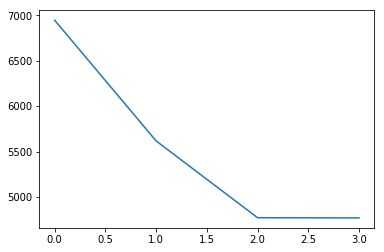

In [16]:
y1=np.copy(list_ener2[:4])
plt.plot(y1)

#### When k=4,

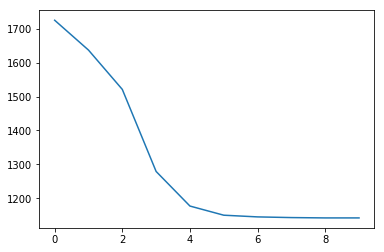

In [17]:
y2=np.copy(list_ener4[:10])
plt.plot(y2)

#### When k=6,

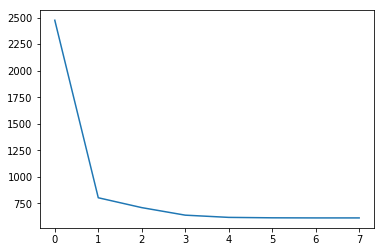

In [18]:
y3=np.copy(list_ener6[:8])
plt.plot(y3)
plt.show()

#### When k=20,

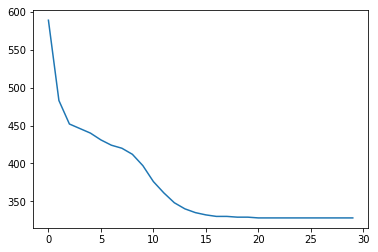

In [20]:
y4=np.copy(list_ener10[:30])
plt.plot(y4)

#### Plot the total of graph about each k.

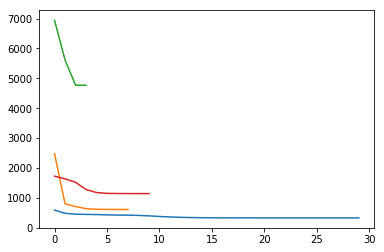

In [26]:
plt.plot(y4)
plt.plot(y3)
plt.plot(y1)
plt.plot(y2)
plt.show()

# Output image for each 𝐾

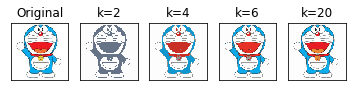

In [24]:
output1 = img
output2 = img
output3 = img
kmeans_vec_2=np.array(kmeans_vec_2)
kmeans_vec_2=kmeans_vec_2.reshape(100,100,3)

kmeans_vec_4=np.array(kmeans_vec_4)
kmeans_vec_4=kmeans_vec_4.reshape(100,100,3)

kmeans_vec_6=np.array(kmeans_vec_6)
kmeans_vec_6=kmeans_vec_6.reshape(100,100,3)

kmeans_vec_10=np.array(kmeans_vec_10)
kmeans_vec_10=kmeans_vec_10.reshape(100,100,3)

output=[img,kmeans_vec_2, kmeans_vec_4, kmeans_vec_6, kmeans_vec_10 ]

titles = ['Original','k=2', 'k=4', 'k=6', 'k=20']

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(output[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()